In [2]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl 
from timple.timedelta import strftimedelta
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import re
from matplotlib.image import imread
from PIL import Image

In [3]:
ff1.Cache.enable_cache('../cache')

In [4]:
year, event, event_type = 2023, 'Azerbaijan', 'Q'
session = ff1.get_session(year, event, event_type)
session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\getou\AppData\Local\Programs

In [5]:
driver_1 = 'LEC'
laps_driver_1 = session.laps.pick_driver(driver_1)
#idk_mate = laps_driver_1.loc[laps_driver_1['LapNumber'] == 50]
idk_mate = laps_driver_1.pick_fastest()
telemetry = idk_mate.get_telemetry().add_distance()
team_driver_1 = laps_driver_1['Team']

In [6]:
colormap = mpl.cm.plasma

In [7]:
x = idk_mate.telemetry['X']
y = idk_mate.telemetry['Y']
color = idk_mate.telemetry['Speed']

In [8]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [9]:
plot_width = 15
plot_height = 20
plot_size = [plot_width, plot_height]
# Calculate font sizes based on the plot size
title_font_size = int(2 * plot_height)  # Adjust the 0.15 multiplier to your liking
axis_label_font_size = int(1.5 * plot_height)  # Adjust the 0.1 multiplier to your liking
lap_time_string = strftimedelta(idk_mate['LapTime'], '%m:%s.%ms')
title = f"{session.event.year} {session.event.EventName} - {session.name} \n {driver_1} {lap_time_string}"
plot_filename = re.sub(r'\W+', '', title.replace("\n", " ")) + ".png"
logo_path = '../RCKMG_logo.png'
logo_img = Image.open(logo_path)

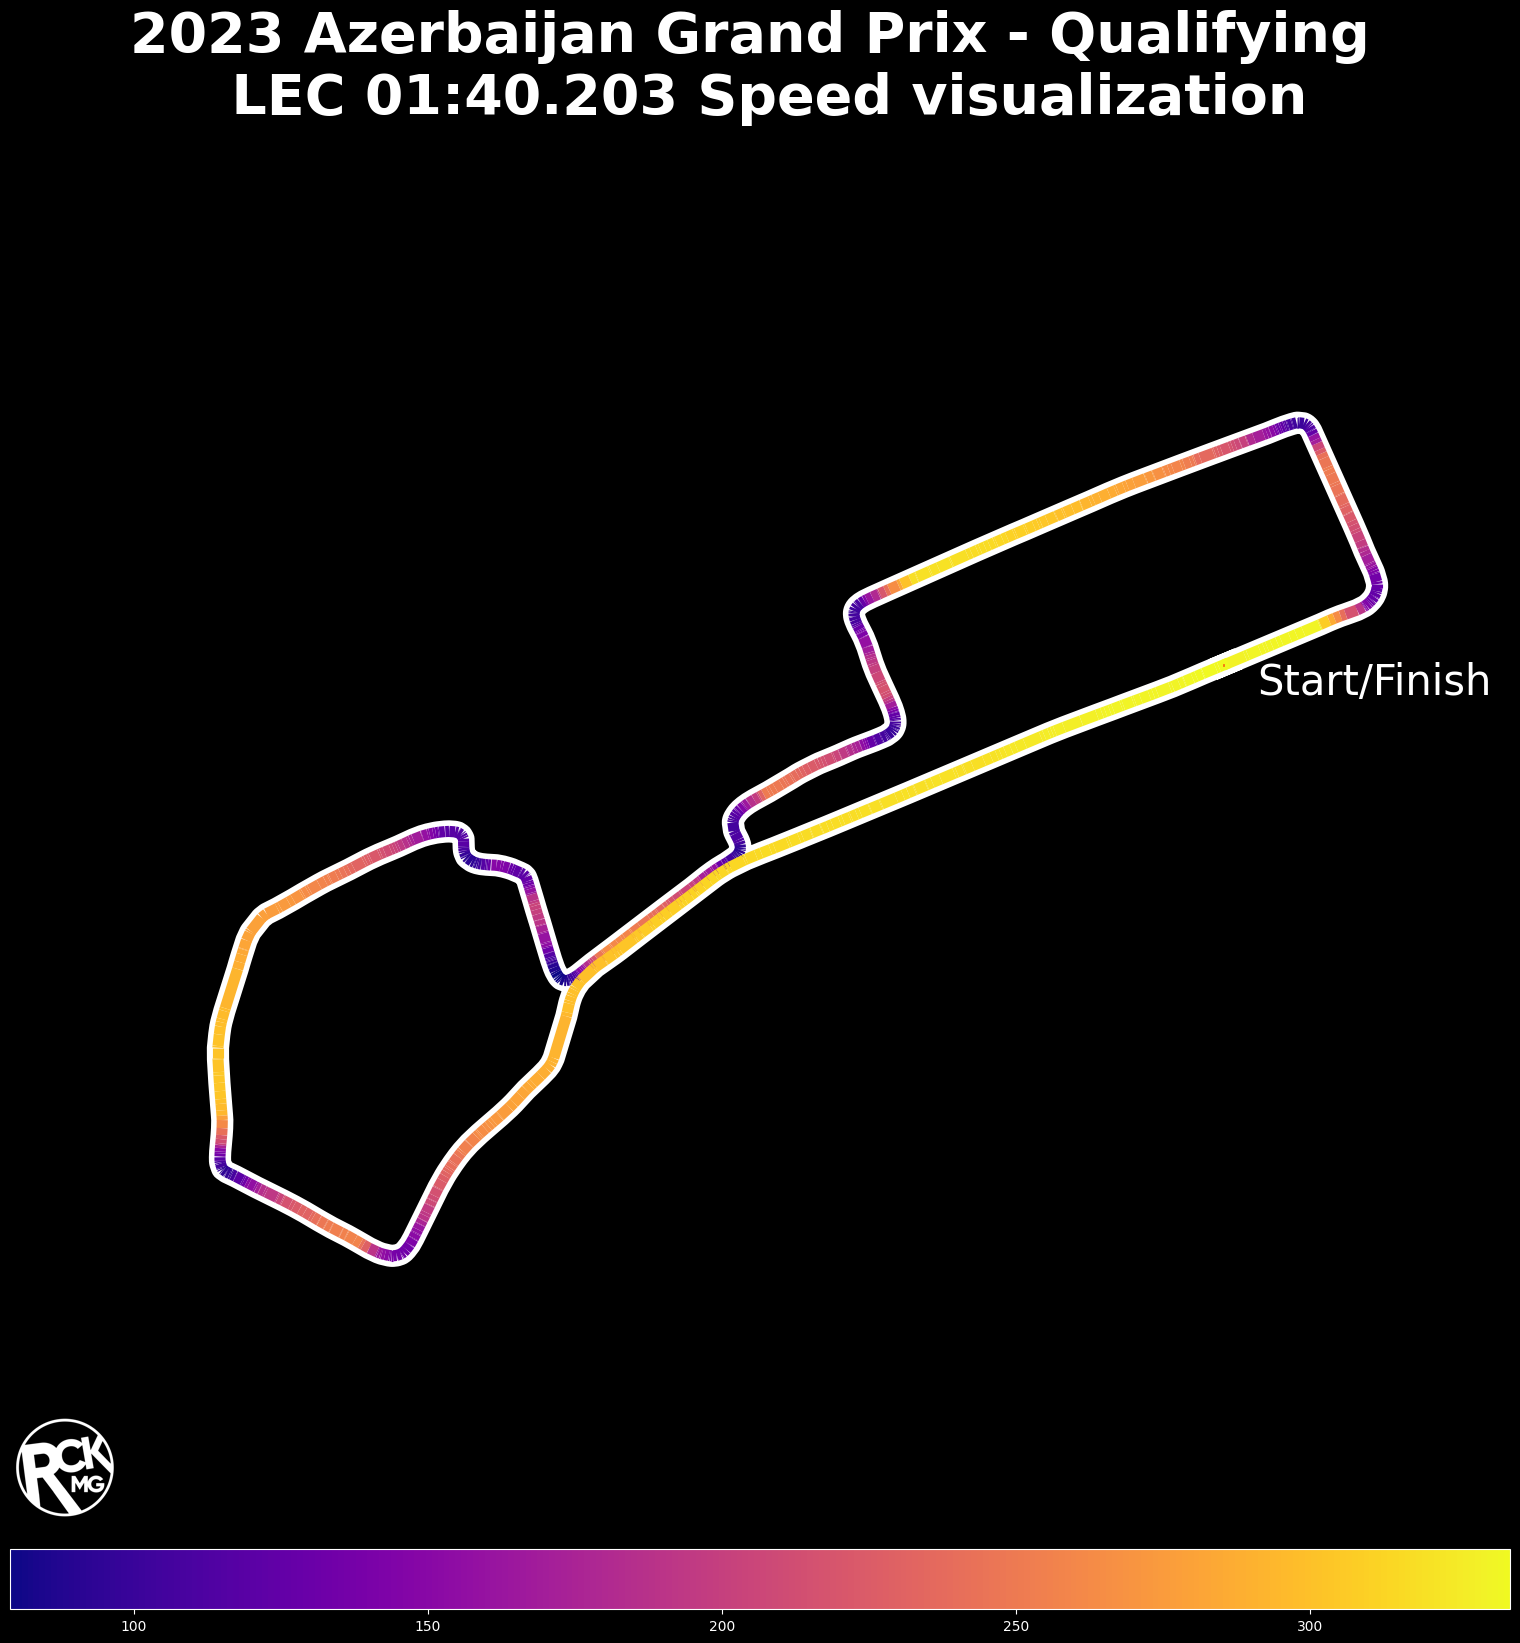

In [14]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True)
plt.suptitle(f"{title} Speed visualization", size = title_font_size, y=0.90, fontweight='bold')
# Adjust margins and turn of axis
plt.style.use('dark_background')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.95, top=0.85, bottom=0.12)


# After this, we plot the data itself.
# Create background track line
# For vertical tracks
ax.plot(idk_mate.telemetry['X'], idk_mate.telemetry['Y'], color='white', linestyle='-', linewidth=16, zorder=0)
ax.set_aspect('equal', 'box')


# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=8)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)

# Find the y-coordinate of the starting point
start_y = segments[0][0][1]

# Calculate the width of the track
track_width = 9  # This is the value you used for lc_comp.set_linewidth()

# Set the start/finish line width to half of the track width
line_width = track_width / 2

# Draw the start/finish line
xmin = segments[0][0][0]
xmax = xmin + line_width
plt.hlines(y=start_y, xmin=xmin, xmax=xmax, color='red', linestyle='--', linewidth=2)

# Add the "Start/Finish" text
text_x = xmax + 600  # You can adjust the 0.5 value to change the distance between the text and the line
text_y = start_y - 300
plt.text(text_x, text_y, 'Start/Finish', fontsize=axis_label_font_size, verticalalignment='center')


# Finally, we create a color bar as a legend.
left_position = (1 - 1) / 2
cbaxes = fig.add_axes([left_position, 0.1, 1, 0.03])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

# Define the new width and height for the logo
new_width = 100
new_height = 100
# Resize the logo
logo_resized = logo_img.resize((new_width, new_height))
logo_resized_np = np.array(logo_resized)
logo_x = 15
logo_y = 125
fig.figimage(logo_resized_np, xo=logo_x, yo=logo_y, zorder=-1, origin='upper', alpha=1)

# Show the plot
plt.rcParams['figure.figsize'] = plot_size
# plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()